In [1]:
from numpy import linspace, exp, sqrt, cos, sin, pi, array, random, meshgrid, sqrt
from scipy.integrate import odeint
from scipy.optimize import minimize, fsolve, curve_fit
from plotly.offline import init_notebook_mode
from plotly import graph_objs as go

In [2]:
def dSUQCdt(SUQC, t):
    S, U, Q, C = SUQC
    # a is the infection rate
    # b is the quarantine rate
    # c is the confirmation rate
    # d is the subsequent confirmation rate
    # N is population
    
    a = 80000
    b = 0.0130
    c = 0.5
    d = 0
    N = 80511
    dSdt = -(a*U*S)/N
    dUdt = -(a*U*S)/N - b*U
    dQdt = b*U - (c + (1-c)*d)*Q
    dCdt = (c + (1-c)*d)*Q
    return array([dSdt, dUdt, dQdt, dCdt])

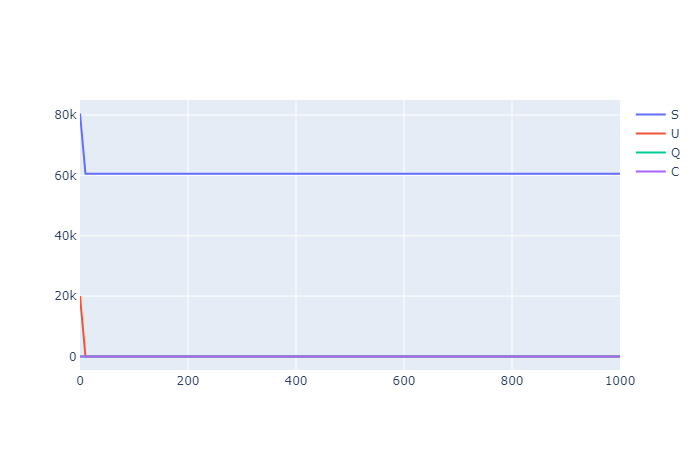

In [3]:
t = linspace(0, 1000, 100)
SUQC = odeint(dSUQCdt, [80511, 20000, 0, 0], t)
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=SUQC[:,0], name='S'))
fig.add_trace(go.Scatter(x=t, y=SUQC[:,1], name='U'))
fig.add_trace(go.Scatter(x=t, y=SUQC[:,2], name='Q'))
fig.add_trace(go.Scatter(x=t, y=SUQC[:,3], name='C'))
fig.show('png')

In [4]:
# Curve Fitting #

In [5]:
# We are trying to prove is quarantine have been proven effective in reducing the infection and fatality rates
# So utilise stringency_index data set of a country that is appropriate in measuring high quarantine rate. A possibility for innovation is we can include a mathematical model on the quarantine rate to account for its time-varying character.
# We fit the curve to y data set of same country to find out parameters for infection rates and confirmation rates.
# Our SUQC function will depict a curve showing confirmed cases. 
# We predict due to lower infection rates, we should see a decline of rate of change in confirmation case.
# Note that quarantine rate is time varying and so we need to take that into account.
def func(x, a, b, c):
    return a * exp(-b * x) + c
xdata = linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
#From hear onwards xdata is the data set from OPEN COVID, particularly the data relevant to confirmation rate parameters
random.seed(1729)
y_noise = 0.2 * random.normal(size=xdata.size)
ydata = y + y_noise



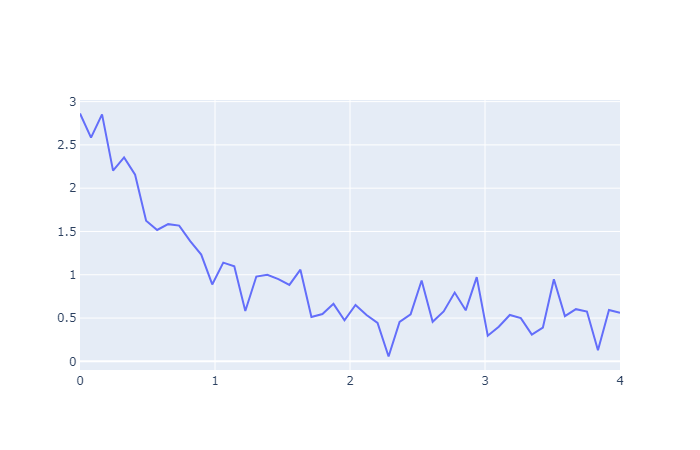

a, b, c =  [2.55423706 1.35190947 0.47450618]


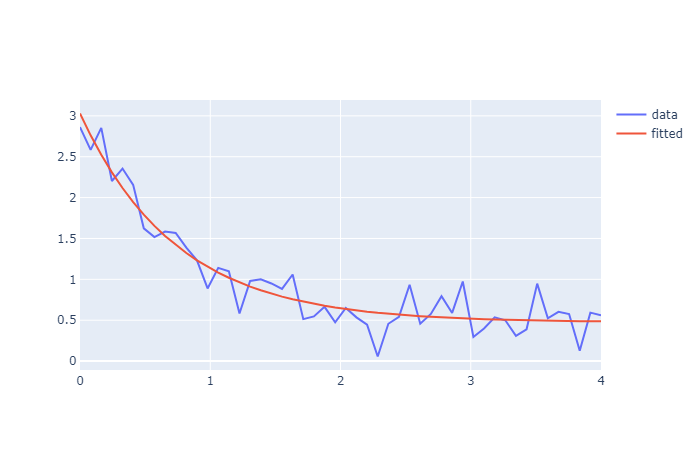

In [13]:
#This piece of code will fit a curve to the data above so that we can determine the values for confirmation rate paramters
fig = go.Figure()
fig.add_trace(go.Scatter(x=xdata, y=ydata, name='data'))
fig.show('png')
popt, pcov = curve_fit(func, xdata, ydata)
print('a, b, c = ', popt)
a, b, c = popt
yfitted = func(xdata, a, b, c)

fig.add_trace(go.Scatter(x=xdata, y=yfitted, name='fitted'))
fig.show('png')